In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [43]:
df = pd.read_csv('amazon.csv')
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [45]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [46]:
df['discounted_price']

0         ₹399
1         ₹199
2         ₹199
3         ₹329
4         ₹154
         ...  
1460      ₹379
1461    ₹2,280
1462    ₹2,219
1463    ₹1,399
1464    ₹2,863
Name: discounted_price, Length: 1465, dtype: object

In [47]:
df['discounted_price'] = df['discounted_price'].str.replace('₹','').str.replace(',','').astype('float64')
df['actual_price'] = df['actual_price'].str.replace('₹','').str.replace(',','').astype('float64')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [49]:
df['discount_percentage']

0       64%
1       43%
2       90%
3       53%
4       61%
       ... 
1460    59%
1461    25%
1462    28%
1463    26%
1464    22%
Name: discount_percentage, Length: 1465, dtype: object

In [50]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')/100
df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

In [51]:
df['rating'].astype('float64')

ValueError: could not convert string to float: '|'

In [ ]:
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [ ]:
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [52]:
df['rating'] = df['rating'].str.replace('|','3.9').astype('float64')




In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [58]:
df['rating_count'] = df['rating_count'].str.replace(',','').astype('float64')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [60]:
####This is Descriptive statistics

In [61]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18295.541353
std,6944.304394,10874.826864,0.216359,0.291620,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [62]:
##### Handling Missing Values

In [65]:
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [67]:
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].median())

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [72]:
##### Duplicates

In [77]:
df.duplicated() == True

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Length: 1465, dtype: bool

In [78]:
#### Data Visualization

<Axes: xlabel='actual_price', ylabel='rating'>

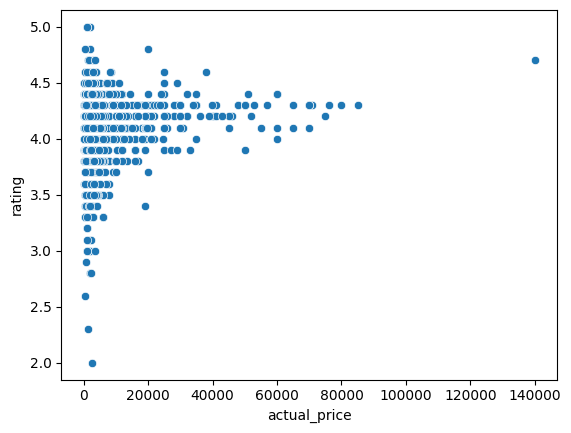

In [79]:
#### actual price vs Rating

sns.scatterplot(x='actual_price',y='rating',data=df)

(0.0, 5000.0)

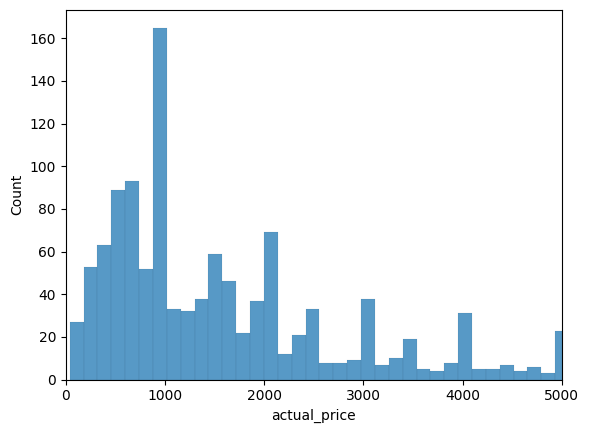

In [86]:
#### Distribution of actual price
sns.histplot(x='actual_price',data=df,bins=1000)
plt.xlim(0,5000)

In [88]:
##### Grouping and Aggregation

In [90]:
df['category'].value_counts()

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          233
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                             

In [93]:
##### Calculate Summary statistics for groups


In [96]:
#### mean rating by Category
print(df.groupby('category')['rating'].mean())

print(df.groupby('product_name')['actual_price'].std())

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [105]:
### Top rating count products by each category

top_reviewed_per_category = df.groupby('category').apply(lambda x : x.nlargest(10,'rating_count')).reset_index(drop=True)
print(top_reviewed_per_category)

     product_id                                       product_name  \
0    B0912WJ87V  Reffair AX30 [MAX] Portable Air Purifier for C...   
1    B097C564GC  rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
2    B094DQWV9B  Kanget [2 Pack] Type C Female to USB A Male Ch...   
3    B009LJ2BXA  Hp Wired On Ear Headphones With Mic With 3.5 M...   
4    B08SCCG9D4  JBL Commercial CSLM20B Auxiliary Omnidirection...   
..          ...                                                ...   
815  B00LOD70SC  Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
816  B07SBGFDX9     Pentonic Multicolor Ball Point Pen, Pack of 10   
817  B00LZPQVMK  Parker Vector Standard Chrome Trim Ball Pen (I...   
818  B0746N6WML  Parker Vector Camouflage Gift Set - Roller Bal...   
819  B00DJ5N9VK  Faber-Castell Connector Pen Set - Pack of 25 (...   

                                              category  discounted_price  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...            2339.0   
1    Co

/var/folders/rx/q737z_cn6xn92nqgm450gk6h0000gn/T/ipykernel_38322/3916858614.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_reviewed_per_category = df.groupby('category').apply(lambda x : x.nlargest(10,'rating_count')).reset_index(drop=True)


<Axes: >

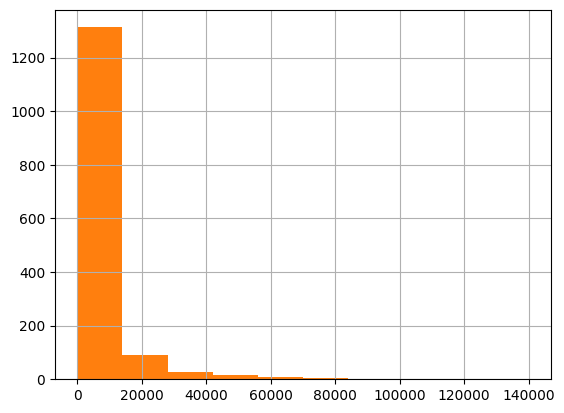

In [107]:
#### Discounted_price vs Actual_price

df['discounted_price'].hist()


<Axes: >

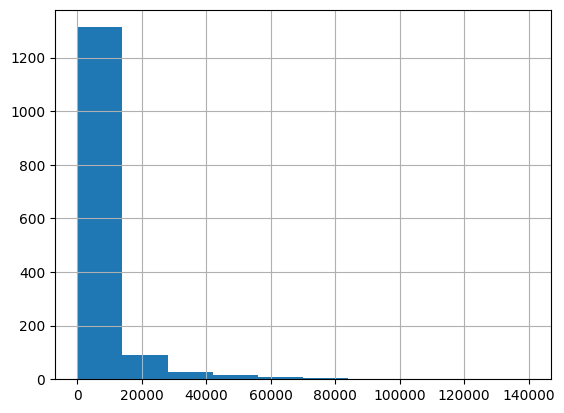

In [108]:
df['actual_price'].hist()

In [109]:
df['discounted_price'].median()

np.float64(799.0)

In [110]:
df['actual_price'].median()

np.float64(1650.0)

<Axes: >

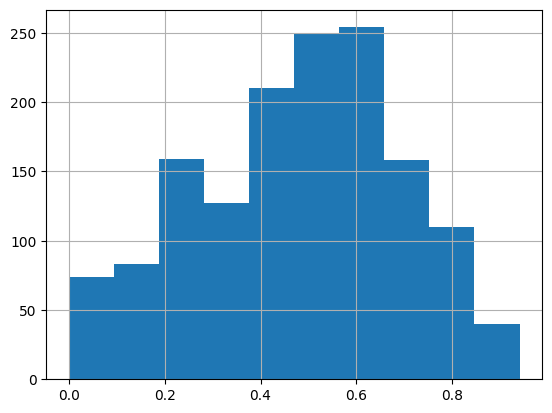

In [111]:
df['discount_percentage'].hist()

In [115]:
#### Average Discount percentage per Category

df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).head(10)

category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                              0.900
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                       0.900
Electronics|Headphones,Earbuds&Accessories|Earpads                                                               0.900
Electronics|Headphones,Earbuds&Accessories|Adapters                                                              0.880
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    0.875
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts                                       0.820
Computers&Accessories|Components|InternalHardDrives                                                              0.800
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                          0.785
Electronics|Mobiles&Accessories|MobileA

In [119]:
#### Most Popular Product

df['product_name'].value_counts().sort_values(ascending=False).head(10)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)                 3
Pinnaclz Original Combo of 2 Micro USB Fast Charging Cable, USB Charging Cable for Data Transfer Perfect for Android Smart Phones White 1.2 Meter Made in India (Pack of 2)                                3
Portronics Konnect L POR-1081 Fast Charging 3A Type-C Cable 1.2Meter with Charge & Sync Function for All Type-C Devices (Grey)                                         

In [123]:
from textblob import textblob

ImportError: cannot import name 'textblob' from 'textblob' (/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/textblob/__init__.py)

In [ ]:
###!pip install -U Textblob

In [125]:
from textblob import TextBlob

In [126]:
df[['product_id','user_id','review_content']]

,product_id,user_id,review_content
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","Bought this instead of original apple, does th..."
...,...,...,...
1460,B08L7J3T31,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","I received product without spanner,Excellent p..."
1461,B01M6453MB,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","ok,got everything as mentioned but the measuri..."
1462,B009P2LIL4,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","plastic but cool body ,u have to find sturdy s..."
1463,B00J5DYCCA,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...",I have installed this in my kitchen working fi...


In [128]:
df['sentiment'] = df['review_content'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [133]:
df.sort_values(by='sentiment',ascending=False)[:10][['product_name', 'sentiment']]

,product_name,sentiment
302,Technotech High Speed HDMI Cable 5 Meter V1.4 ...,1.000000
1309,Khaitan ORFin Fan heater for Home and kitchen-...,0.755000
872,CP PLUS 2MP Full HD Smart Wi-fi CCTV Security ...,0.735000
987,Foxin FTC 12A / Q2612A Black Laser Toner Cartr...,0.700000
1352,"Butterfly Hero Mixer Grinder, 500W, 3 Jars (Grey)",0.700000
625,Seagate Expansion 1TB External HDD - USB 3.0 f...,0.700000
134,AmazonBasics New Release ABS USB-A to Lightnin...,0.700000
750,Eveready Red 1012 AAA Batteries - Pack of 10,0.700000
934,Cablet 2.5 Inch SATA USB 3.0 HDD/SSD Portable ...,0.688889
724,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",0.679091


In [134]:
### Co-relation between discounted price and rating

df['discounted_price'].corr(df['rating'])

np.float64(0.12038590592557359)

In [138]:
### Top 5 categories based with highest ratings

df.groupby('category')['rating'].mean().reset_index().sort_values(by='rating',ascending=False).head(10)

,category,rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
196,OfficeProducts|OfficeElectronics|Calculators|B...,4.5
148,"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...",4.5
118,Electronics|PowerAccessories|SurgeProtectors,4.5
194,HomeImprovement|Electrical|CordManagement,4.5
123,Home&Kitchen|CraftMaterials|PaintingMaterials,4.5
38,Computers&Accessories|Components|Memory,4.5
